In [1]:
from mp1 import *
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import  Dense , Activation , Conv2D, MaxPooling2D, Dropout, Flatten, Reshape, UpSampling2D, ZeroPadding2D, Input
from keras.optimizers import SGD, Adam
from keras.utils import np_utils


Using TensorFlow backend.


## I- Simple Classification

In this first problem, we will predict the shape of a figure. 
The aim is to classify a figure between a rectangle, a triangle and a disk. <br>
We begin by generating our data (I erased the printing of the number of the created data during the creation phase).

In [2]:
[X_train, Y_train] = generate_dataset_classification(300,20)
Y_train = np_utils.to_categorical(Y_train, 3)

Creating data:


We will now create a simple linear classifier.
For this, we will only need one Dense layer.

In [3]:
model = Sequential()

model.add(Dense(3, input_shape = (5184,)))
model.add(Activation('softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15555     
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 32, epochs=30, verbose=1)

Epoch 1/30
300/300 [==============================] - 11s 35ms/step - loss: 1.9577 - acc: 0.3767
Epoch 2/30
300/300 [==============================] - 0s 116us/step - loss: 0.7724 - acc: 0.6667
Epoch 3/30
300/300 [==============================] - 0s 122us/step - loss: 0.4984 - acc: 0.7733
Epoch 4/30
300/300 [==============================] - 0s 98us/step - loss: 0.3765 - acc: 0.8700
Epoch 5/30
300/300 [==============================] - 0s 112us/step - loss: 0.3291 - acc: 0.9033
Epoch 6/30
300/300 [==============================] - 0s 123us/step - loss: 0.3539 - acc: 0.8433
Epoch 7/30
300/300 [==============================] - 0s 99us/step - loss: 0.2804 - acc: 0.8800
Epoch 8/30
300/300 [==============================] - 0s 145us/step - loss: 0.2557 - acc: 0.8967
Epoch 9/30
300/300 [==============================] - 0s 118us/step - loss: 0.2060 - acc: 0.9367
Epoch 10/30
300/300 [==============================] - 0s 97us/step - loss: 0.1815 - acc: 0.9600
Epoch 11/30
300/300 [===========

After having train our model, we evaluate it to see how well it has done. 
We obtain a final loss of 0.05, which is very low. The final acccuracy that we obtain is 1, as can be seen in the following cell. <br>
The problem isn't hard to solve and is mainly linearly separable (enot totally ebcause of the noise) which is why we can have such a good result with only a small perceptron. We could have expected such good results before training it.

In [5]:
[X_test, Y_test] = generate_dataset_classification(200,20)
Y_test = np_utils.to_categorical(Y_test, 3)
model.evaluate(X_test, Y_test)

Creating data:
200/200 [==============================] - 0s 118us/step


[0.06158952742815018, 1.0]

We can test our result one examples to see if it predict well what we wanted :

In [6]:
nb_to_name = ['rectangle', 'disk', 'triangle']

X_test1 = generate_a_rectangle()
X_test2 = generate_a_disk()
X_test3 = generate_a_triangle()[0]

X_test1 = X_test1.reshape(1, X_test1.shape[0])
X_test2 = X_test2.reshape(1, X_test2.shape[0])
X_test3 = X_test3.reshape(1, X_test3.shape[0])

t1 = np.argmax(model.predict(X_test1))
t2 = np.argmax(model.predict(X_test2))
t3 = np.argmax(model.predict(X_test3))

print('We give the neural network a rectangle and it returns a '+nb_to_name[t1])
print('We give the neural network a disk and it returns a '+nb_to_name[t2])
print('We give the neural network a triangle and it returns a '+nb_to_name[t3])


We give the neural network a rectangle and it returns a rectangle
We give the neural network a disk and it returns a disk
We give the neural network a triangle and it returns a triangle


## II- Visulization of the Solution

We  now want to look at the solution we get. We would like to see if we can infer a relation between the form predicted and the weights we obtain for our figure. <br>
It's hard to see anything in the weights, but we can see a bit of a very noised square, disk and triangle respectively in the three weight matrices.

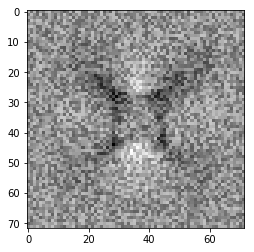

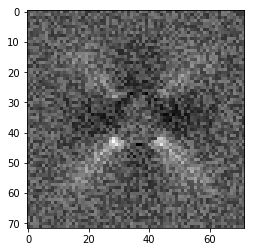

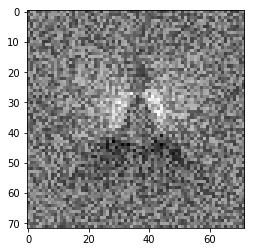

In [7]:
## Visualisation of the Solution

classifier = model.get_weights()[0]
cl1 = classifier[:,0]
cl2 =  classifier[:,1]
cl3 = classifier[:,2]

size = int(np.sqrt(cl1.shape[0]))

cl1 = cl1.reshape((size, size))
cl2 = cl2.reshape((size, size))
cl3 = cl3.reshape((size, size))

plt.figure(1)
plt.imshow(cl1, cmap='gray')
plt.figure(2)
plt.imshow(cl2, cmap='gray')
plt.figure(3)
plt.imshow(cl3, cmap='gray')

## III- A More Difficult Classification Problem 

We will now study a harder problem : we allow the different shapes to move in the image. Hence, the shapes won't necessarily be on the same place, and it will be far harder for the neural netork to differentiate them. <br>
The data aren't linearly separable as it was the case before. This is why the perceptron will give very bad results.

In [8]:
[X_train, Y_train] = generate_dataset_classification(500, 20, True)
Y_train =  np_utils.to_categorical(Y_train, 3)

Creating data:


In [9]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 32, epochs=10, verbose=1)

Epoch 1/10
500/500 [==============================] - 0s 266us/step - loss: 3.4919 - acc: 0.3080
Epoch 2/10
500/500 [==============================] - 0s 70us/step - loss: 2.5127 - acc: 0.3660
Epoch 3/10
500/500 [==============================] - 0s 81us/step - loss: 1.8550 - acc: 0.3780
Epoch 4/10
500/500 [==============================] - 0s 71us/step - loss: 1.5651 - acc: 0.3880
Epoch 5/10
500/500 [==============================] - 0s 80us/step - loss: 1.2873 - acc: 0.4420
Epoch 6/10
500/500 [==============================] - 0s 66us/step - loss: 1.2175 - acc: 0.4320
Epoch 7/10
500/500 [==============================] - 0s 74us/step - loss: 1.0364 - acc: 0.5180
Epoch 8/10
500/500 [==============================] - 0s 76us/step - loss: 0.9797 - acc: 0.4980
Epoch 9/10
500/500 [==============================] - 0s 67us/step - loss: 1.0416 - acc: 0.5440
Epoch 10/10
500/500 [==============================] - 0s 69us/step - loss: 0.8803 - acc: 0.5800


As can be seen in the results, the loss that we obtain is around 1. Moreover, the accuracy is just above 0.5, which means that we give wrong predictions almost half of the times. <br>
This is still better than a random prediction that would give us an accuracy of $\frac{1}{3}$, because we have three classes, but we can still do far better with a more sophisticated neural network as we will see with the next model.

In [10]:
[X_test, Y_test] = generate_test_set_classification()
model.evaluate(X_test, Y_test)

Creating data:
300/300 [==============================] - 0s 108us/step


[0.9371261223157247, 0.5300000003973643]

In [11]:
[X_train, Y_train] = generate_dataset_classification(500, 20, True)
Y_train =  np_utils.to_categorical(Y_train, 3)

size = int(np.sqrt(X_train.shape[1]))

X_train = X_train.reshape((X_train.shape[0], size,size,1))
print(X_train.shape)

Creating data:
(500, 72, 72, 1)


In order to have good results in our classification problem, we add a convolutional layer to our neural networks. <br>
Indeed, it is well known that neural network with convoluntional layers have really good results with image data.
This comes from the fact that we can express lots of usual image process as convolution. For example, finding edges is done in computing a Laplacian. 

In [12]:
model2 = Sequential()
model2.add(Conv2D(16, (5,5) , input_shape =(size,size,1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(3, activation='softmax'))

print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 55491     
Total params: 55,907
Trainable params: 55,907
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(X_train,Y_train, batch_size=32, epochs=30, verbose=1)

Epoch 1/30
500/500 [==============================] - 3s 7ms/step - loss: 1.2650 - acc: 0.4000
Epoch 2/30
500/500 [==============================] - 1s 2ms/step - loss: 0.8888 - acc: 0.6420
Epoch 3/30
500/500 [==============================] - 1s 2ms/step - loss: 0.7541 - acc: 0.6880
Epoch 4/30
500/500 [==============================] - 1s 2ms/step - loss: 0.6471 - acc: 0.7940
Epoch 5/30
500/500 [==============================] - 1s 2ms/step - loss: 0.5755 - acc: 0.8020
Epoch 6/30
500/500 [==============================] - 1s 2ms/step - loss: 0.5278 - acc: 0.8080
Epoch 7/30
500/500 [==============================] - 1s 2ms/step - loss: 0.4759 - acc: 0.8520
Epoch 8/30
500/500 [==============================] - 1s 2ms/step - loss: 0.4222 - acc: 0.8780
Epoch 9/30
500/500 [==============================] - 1s 2ms/step - loss: 0.3835 - acc: 0.8900
Epoch 10/30
500/500 [==============================] - 1s 2ms/step - loss: 0.3564 - acc: 0.8960
Epoch 11/30
500/500 [============================

As expected, the results are far better than with the previous model. <br>
We finally obtain a loss of less than 0.5, which is half smaller than the previous one, and an accuracy of 0.8, which means that we are closer to the real class than before, and that we are right most of the time.

In [14]:
[X_test, Y_test] = generate_test_set_classification()

size = int(np.sqrt(X_test.shape[1]))

X_test = X_test.reshape((X_test.shape[0], size,size,1))
model2.evaluate(X_test, Y_test)

Creating data:
300/300 [==============================] - 0s 1ms/step


[0.47164380192756655, 0.8133333325386047]

## IV- A regression Problem

After doing classification problems, we will do some regression problem.
Now the results that we want to predict is not just the class of a data, but more precisely the evaluation of this data through a fucntion that we want to evaluate. <br>
The problem that we are now facing is the one of predicting the coordinate odf a triangle given its image. The trinagle will be noised to make it more difficutl to find the true result. <br><br>
First, we will need to normalize the data that we get.
Indeed, it should be notice that for a same traiangle, we may have different results for the array of coordinate of the triangle. To solve this problem, we will need to sort the vertices of the triangle, so that we can differentiate them. <br>
For this, we will sort them by increasing abscissa. The following function do exactly this.

In [15]:
def process_data(y):
    y_pre = np.zeros(y.shape)
    for i in range(len(y)):
        index = np.argsort(y[i,::2])
        y_pre[i,::2] = y[i,2*index]
        y_pre[i,1::2] = y[i,2*index+1]
    return y_pre
        
        

Now, we will normalize our data. After ordering the vertices with increasing abscissa, we will also center and normalise them to simplify a bit the problem. <br>
As we are using a convolutional neuarl network, this shouldn't change anything about th result we obtain, except that the loss will be normalised. However, depending on the algorithm we use, it may give significant improvement to center the data for a regression.

In [16]:
[X_train, Y_train] = generate_dataset_regression(3000, 20)
[X_val, Y_val] = generate_dataset_regression(50,20)
[X_test, Y_test] = generate_test_set_regression()

size = int(np.sqrt(X_train.shape[1])) 

X_train = X_train.reshape((X_train.shape[0], size,size,1))
X_val = X_val.reshape((X_val.shape[0], size, size, 1))
X_test = X_test.reshape((X_test.shape[0], size, size,1))

Y_train = process_data(Y_train)
Y_val = process_data(Y_val)

meaned = np.mean(Y_train, axis = 0)
variance = np.std(Y_train, axis=0)

Y_train = (Y_train-meaned)/variance
Y_val = (Y_val-meaned)/variance
Y_test = (Y_test - meaned)/variance


Creating data:
Creating data:
Creating data:


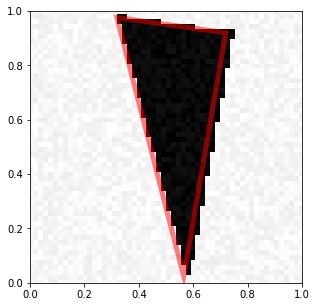

[ 0.38313229  1.62846875  0.31670102 -1.6488751  -0.12386993  1.45833313]


In [17]:
visualize_prediction(X_train[0], variance*Y_train[0]+meaned)
print(Y_train[0])

The neural network that we use is a standard convolutional one. We begin to use some convolution adn max-pooling layer, in order to have good results on the image.
We use some Dropout to improve the results at the end.
We then use the standard Dense layers.

In [18]:
model3 = Sequential()

model3.add(Conv2D(64, (5,5), input_shape=(size,size,1), activation='relu', strides=1))
model3.add(Dropout(0.1))
model3.add(MaxPooling2D((2,2)))
model3.add(Conv2D(64, (3,3), activation='relu', strides=1))
model3.add(Dropout(0.1))
model3.add(MaxPooling2D((2,2)))
model3.add(Conv2D(64, (3,3), activation='relu', strides=1))
model3.add(Dropout(0.1))

model3.add(Flatten())
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(6))

print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 68, 68, 64)        1664      
_________________________________________________________________
dropout_1 (Dropout)          (None, 68, 68, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
__________

In [19]:
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_val,Y_val))

Train on 3000 samples, validate on 50 samples
Epoch 1/50
3000/3000 [==============================] - 49s 16ms/step - loss: 0.6948 - val_loss: 0.3608
Epoch 2/50
3000/3000 [==============================] - 48s 16ms/step - loss: 0.3909 - val_loss: 0.3115
Epoch 3/50
3000/3000 [==============================] - 52s 17ms/step - loss: 0.3138 - val_loss: 0.2226
Epoch 4/50
3000/3000 [==============================] - 52s 17ms/step - loss: 0.2506 - val_loss: 0.1527
Epoch 5/50
3000/3000 [==============================] - 52s 17ms/step - loss: 0.2166 - val_loss: 0.1410
Epoch 6/50
3000/3000 [==============================] - 48s 16ms/step - loss: 0.1973 - val_loss: 0.1209
Epoch 7/50
3000/3000 [==============================] - 47s 16ms/step - loss: 0.1789 - val_loss: 0.1065
Epoch 8/50
3000/3000 [==============================] - 51s 17ms/step - loss: 0.1612 - val_loss: 0.0804
Epoch 9/50
3000/3000 [==============================] - 48s 16ms/step - loss: 0.1434 - val_loss: 0.1215
Epoch 10/50
3000/3

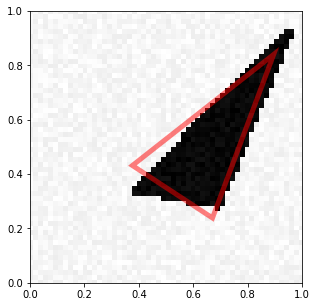

0 [ 3.6444007   1.49808932  0.82054291 -0.78289449 -1.94579659 -0.57322489] [ 0.68343747 -0.23941058  0.7957666  -0.910677    0.77719927  1.1821308 ]


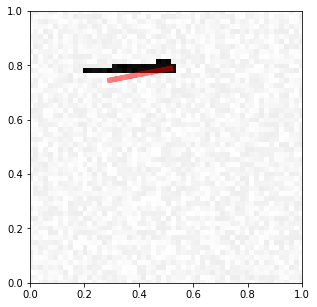

1 [ 1.29657365  1.07225743 -1.43288126  0.9443588  -1.18083533  1.00412968] [ 0.20064126  0.83078647 -0.14285532  0.9527376  -1.1193645   1.0080134 ]


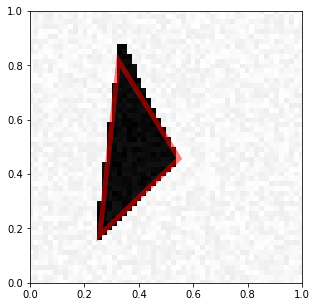

2 [-0.06779944 -1.1907877   0.08947515 -0.1709344  -2.1582995   1.2990153 ] [ 0.05386171 -1.1182394  -0.765513    1.0794722  -1.0013412  -0.14140378]


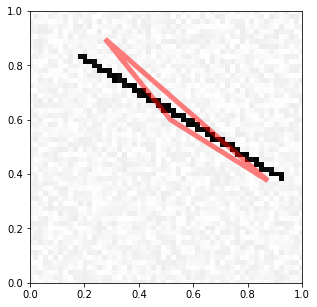

3 [-0.44066758  1.1703636   0.36916312  0.28952273  0.85506004 -0.41801326] [ 0.15888704  1.3557341   0.09576105  0.33638462  0.6665523  -0.4223794 ]


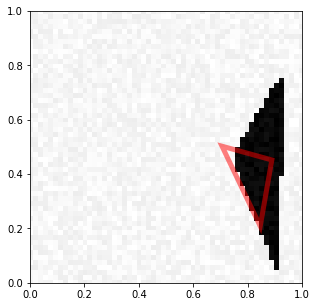

4 [ 3.36886199 -1.53238395  1.08679673 -0.160967    0.81420832  0.86007136] [ 2.4113903  0.0041924  1.5901902 -1.0147423  0.743395  -0.1592845]


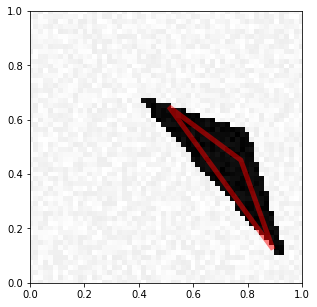

5 [ 2.77967662  0.15123052 -0.44478237  0.61385086  0.83264045 -1.39355794] [ 1.38748     0.5014816   1.2675229  -0.17724109  0.7648283  -1.2933499 ]


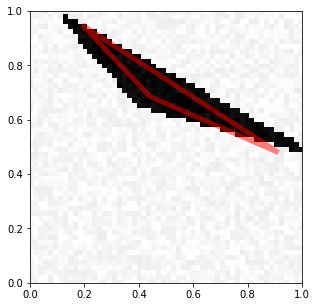

6 [ 0.74860245  0.52893063 -1.74210978  1.6518608   1.25686448 -0.04969826] [-0.28276378  1.5336399  -0.23961529  0.62623703  0.867213   -0.06486799]


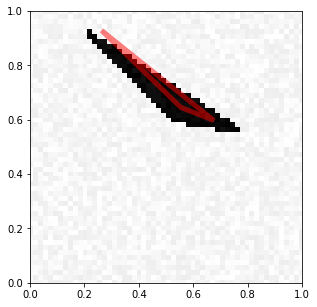

7 [ 2.62830136  0.19887928  0.12167435  0.31932208 -2.75671291  1.45872264] [ 0.08558264  1.4649776   0.26981303  0.49151018 -0.34651133  0.34290105]


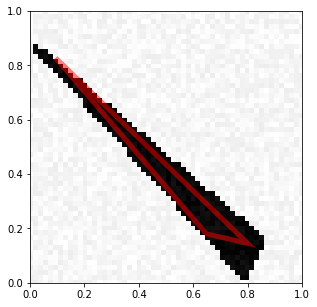

8 [ 2.75426255 -1.69496689  1.56099822 -1.22827063 -3.75785228  1.2944182 ] [-0.79684794  1.1179224   0.69317085 -1.1112123   0.28825128 -1.219911  ]


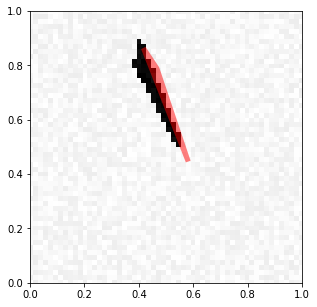

9 [ 0.67199118  1.04482779  0.19143346 -0.02599835 -1.84155619  1.39999999] [ 0.89568514  1.2411319  -0.12983799  0.98590773 -0.8299824  -0.17860782]


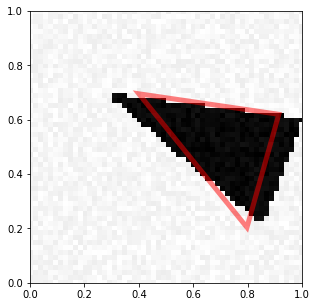

10 [ 0.26759743  0.62721173  2.1486848   0.32920321  0.45251281 -0.94437244] [ 0.8061022   0.66553503  1.3691373  -1.0297717   0.8743194   0.42099008]


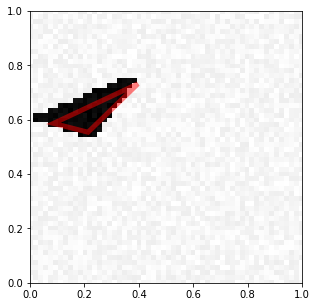

11 [ 0.60122794  0.87087752 -2.22418152  0.34474467 -2.68307974  0.14011492] [-0.8389692   0.29178745 -1.2751322   0.17656769 -1.7767866   0.8086352 ]


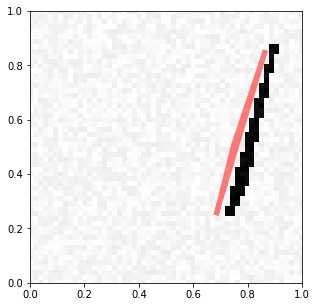

12 [ 2.4239842  -0.88661364  1.74142048  1.27505599  0.11475517 -0.56161379] [ 2.2968447  -0.86445135  1.1485046   0.02200996  0.62094694  1.2346927 ]


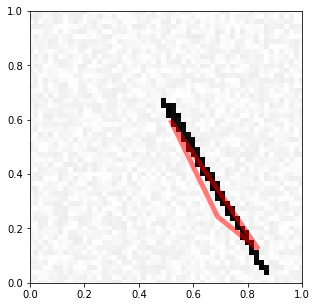

13 [ 1.168926    0.57095315  1.62139641 -1.66525304 -1.24906711  0.5336724 ] [ 1.4175442   0.33466122  0.8810593  -0.8941991   0.49053514 -1.2950749 ]


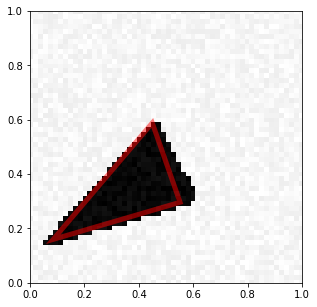

14 [-1.06006809 -1.27221174 -0.22967582  0.28326529 -0.78630927 -0.67741799] [-0.8444975  -1.1716293  -0.20618364  0.29432797 -0.98319    -0.6973751 ]


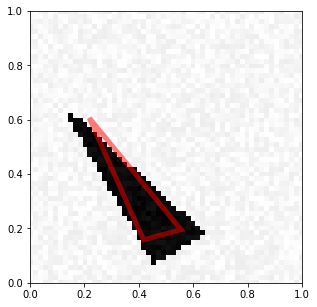

15 [ 1.03774693 -1.4738002  -1.61887399  0.37459657 -0.68679294 -1.1235138 ] [-0.14716351  0.35944661 -0.3516956  -1.1870285  -0.9649813  -1.0456161 ]


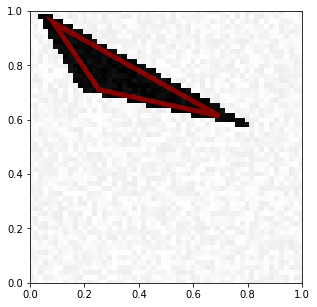

16 [-1.15334076  1.70153738 -1.45192423  0.74820759  0.19078642  0.28268047] [-0.8391714   1.5623766  -1.0924826   0.71676654 -0.24280964  0.40065446]


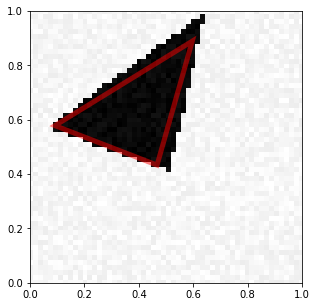

17 [ 1.91702927  1.62445299 -0.02858594 -0.27725636 -3.42524915  0.25762456] [-0.81116587  0.26386207 -0.12706539 -0.24039668 -0.75316066  1.351446  ]


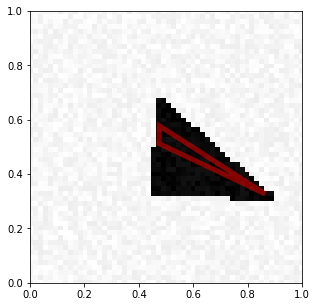

18 [ 1.03793022 -0.58644078 -0.19033104  0.59979884  0.65072611 -0.67364713] [ 1.1949437   0.03893395 -0.0853156   0.25739834  0.61809826 -0.59014076]


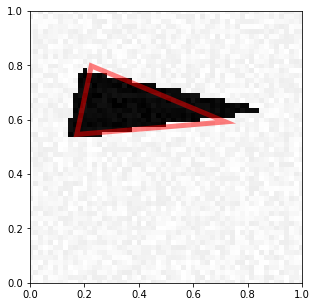

19 [-0.34191551  0.93301907  1.4104646   0.46062612 -3.14988693  0.13218034] [-0.3897034   0.15272892 -1.2211529   1.0175071  -0.12526956  0.3248387 ]


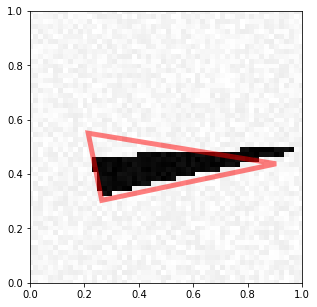

20 [ 0.03985199 -0.60156226  2.03765024 -0.05032719 -2.67116003 -0.15914055] [-0.16932277  0.16774128 -1.0466225  -0.68725985  0.82323    -0.20827197]


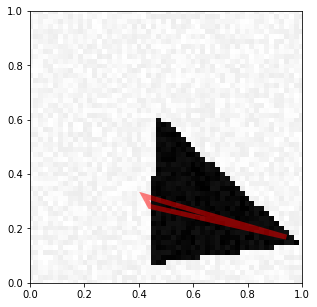

21 [ 0.96873322 -1.48708143 -0.1625788   0.3105809   1.07467995 -1.23388978] [ 0.91124636 -0.6225587  -0.24408051 -0.7649669   1.016871   -1.1411394 ]


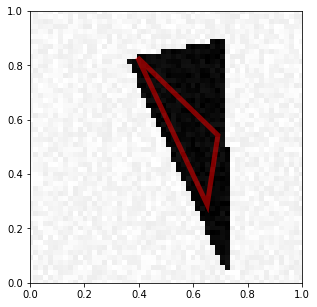

22 [ 2.34222568  1.34229421 -0.64026102  1.10024532 -0.19422531 -1.557456  ] [ 0.78417414  1.1223536   0.7078824  -0.743398   -0.27115154  0.15571564]


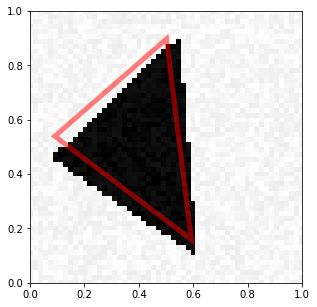

23 [-0.84224252 -0.1519748   0.13524113  1.32615098 -0.80018464 -1.34534498] [-0.8145327   0.13073143  0.03031858  1.3591543  -0.77142406 -1.1716272 ]


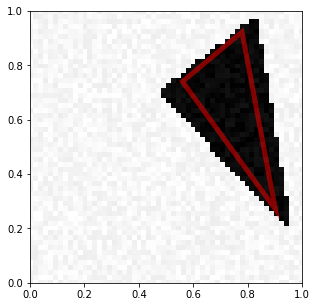

24 [ 3.57285627 -1.00643828 -0.09404959  0.68541893  0.34084999  1.63235175] [ 1.6494677  0.8194254  1.2872901  1.4470152  0.8086465 -0.7843556]


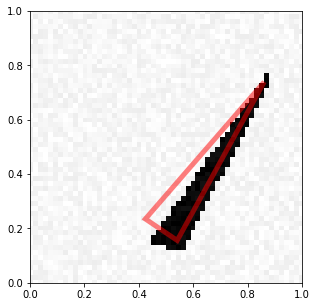

25 [ 0.98415653 -1.26176769  1.64550318  0.87167311 -1.04854279 -1.29350424] [ 0.93367034 -0.9136258   0.20852754 -1.1951681   0.5987006   0.83216834]


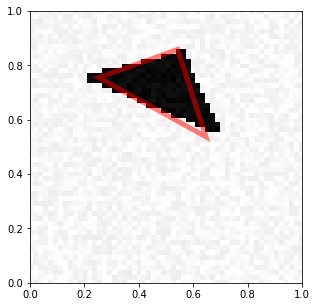

26 [ 2.21966231  0.19536799 -1.29071856  0.87356848 -1.04786545  1.20716505] [ 0.03591761  0.86772335  0.21588922  1.2259148  -0.4954642   0.13581349]


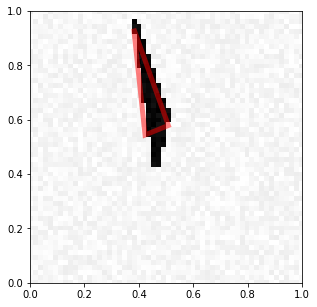

27 [ 0.64980264  1.62611268 -0.22514121 -0.27952662 -1.30040158  0.39072078] [ 0.70959395  1.4847101  -0.32612774  0.14189167 -1.2027665   0.27927616]


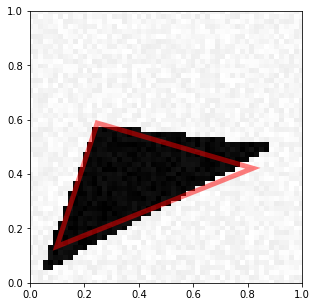

28 [ 3.1835719  -0.01583911 -1.17122609  0.23031832 -3.58202193 -1.56981695] [-0.776054   -1.2609928  -1.1220421   0.2930882   0.38611546 -0.26485553]


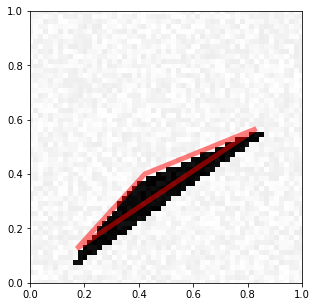

29 [ 3.0692174   0.16878071 -1.53785129 -1.5153355  -1.87219879 -0.51038646] [-0.38981616 -1.2891911  -0.33208144 -0.35334793  0.44860095  0.23916323]


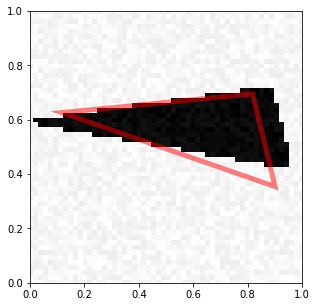

30 [ 3.22842399  0.73078269  1.97301834 -0.25822344 -3.76759145  0.31960135] [-0.6782967   0.42785704  1.4603759   0.66162705  0.80436456 -0.4983653 ]


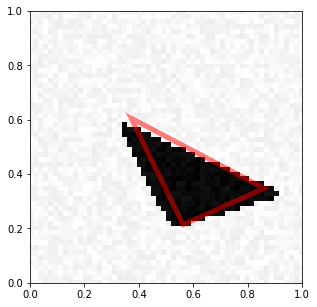

31 [ 1.38632524 -1.01508864 -0.77780674  0.25211022  0.76395079 -0.61307805] [ 0.6584079   0.3580674   0.30781117 -0.99566513  0.59741884 -0.5192489 ]


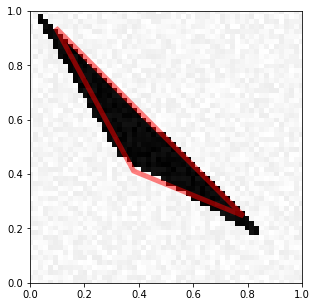

32 [-1.15992905  1.65554846 -0.81054217 -0.09091837  0.40202778 -1.1264292 ] [-0.7948063   1.497162   -0.51583517 -0.31572637  0.20811339 -0.86988586]


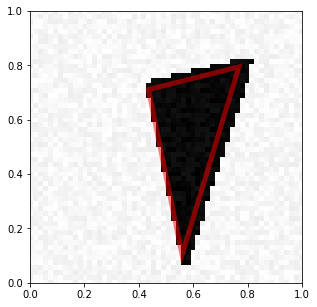

33 [ 2.8780002   1.11991774 -0.33166393  0.78782797 -0.9716147  -1.52097503] [ 0.99301416  0.71844757  0.28886425 -1.3773315   0.12541552  1.0252515 ]


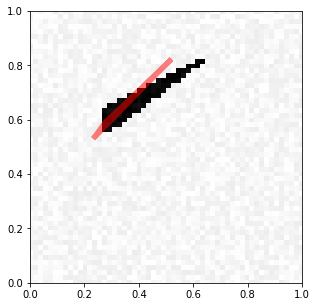

34 [ 1.9420402   1.1037096  -1.07214718  0.44100589 -2.45786265  0.18959834] [-0.07242957  0.09925601 -0.9987705   0.29598704 -1.1448274   1.1241108 ]


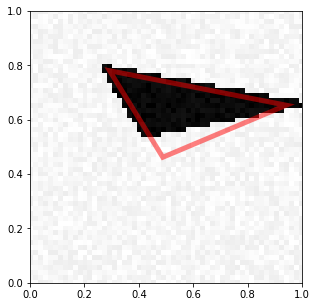

35 [ 0.84571614  0.13567034  2.17309741  0.53610855 -2.48991919  1.02315533] [ 0.24334921  0.956386   -0.0313733  -0.14087784  1.0145919   0.5367742 ]


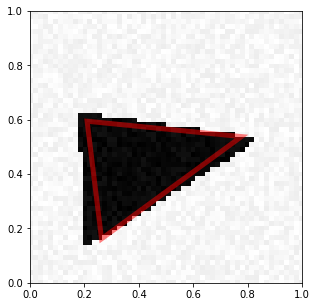

36 [ 2.90539634  0.07076394 -1.44799282  0.39831336 -2.83694096 -1.26833783] [-0.19047438  0.3193159  -1.0505228  -1.1747621   0.17261046  0.13795494]


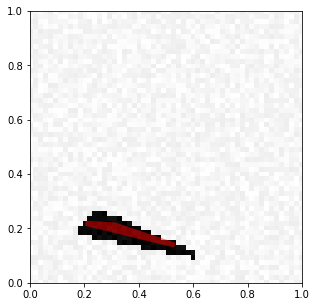

37 [-0.43216082 -1.100679   -1.14737538 -0.86442017 -0.79039127 -1.41498906] [-0.21855114 -0.9685624  -0.8321696  -0.9984197  -1.084789   -1.2418512 ]


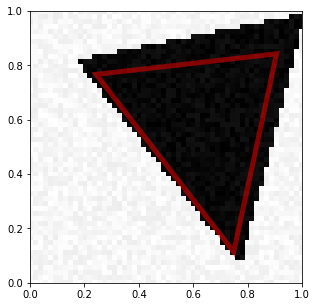

38 [ 3.82969348  1.65198221  1.16108605 -1.47574799 -2.90814128  1.10070936] [-0.01541515  0.9101885   1.149249   -1.3392049   0.83225167  1.1902691 ]


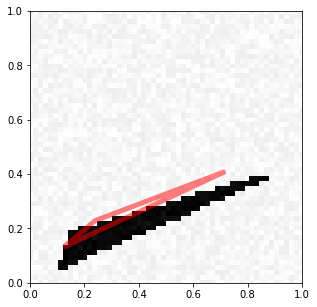

39 [-0.55797666 -1.11853074 -1.76022662 -1.54881173  0.53717378 -0.39225665] [-0.63921195 -1.2685378  -1.1537275  -0.9438883  -0.13130675 -0.3045869 ]


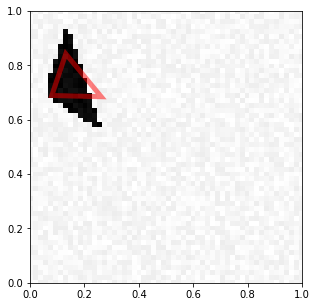

40 [-0.99588161  0.69601274 -1.6858696   1.45517399 -2.59756055  0.26135542] [-0.8711599   0.64421785 -1.6459826   1.1698955  -2.4656205   0.6450116 ]


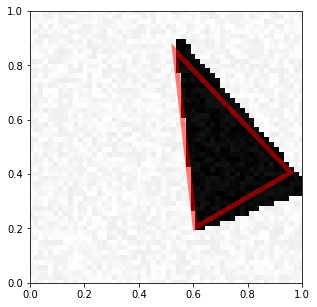

41 [ 1.46424436  1.37816372  0.46656563 -1.06829298  1.30553896 -0.54636638] [ 1.4981695   1.2115036   0.50855255 -1.0305821   1.0963514  -0.31858227]


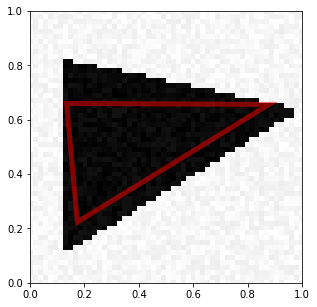

42 [-0.70953222  1.08317686 -1.69825596 -1.33972917  1.04608356  0.46949956] [-0.586608    0.54363036 -1.4526852  -0.96254015  0.6911078   0.5472296 ]


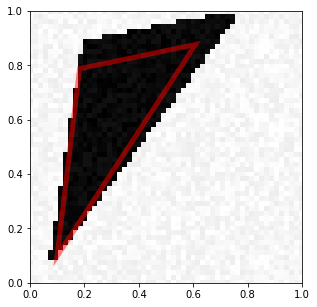

43 [ 2.56264766  1.69976046 -1.39699644  1.32594038 -3.44837095 -1.42554916] [-0.76855415 -1.3833209  -1.4159275   0.98143494 -0.6911659   1.3088893 ]


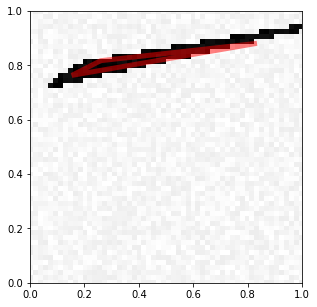

44 [-0.35077147  1.04898868  2.27575915  1.53932948 -3.48553568  0.79492394] [-0.48421657  0.8979544  -1.0641629   1.0834315   0.46240973  1.3236591 ]


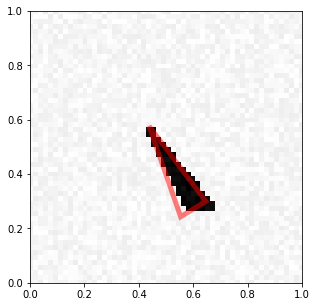

45 [ 1.66703966 -0.80169522 -0.35402333  0.22558636 -0.41614811 -0.80713862] [ 1.0055771   0.2564868   0.2660949  -0.8955565  -0.49754155 -0.685755  ]


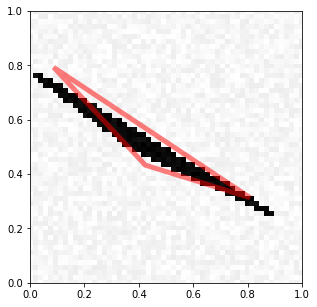

46 [-1.24113373  0.9192633   1.68378864 -0.87585158 -2.01999026  0.02721888] [-0.83547777  0.9991191  -0.322898   -0.2403043   0.33559036 -0.6394625 ]


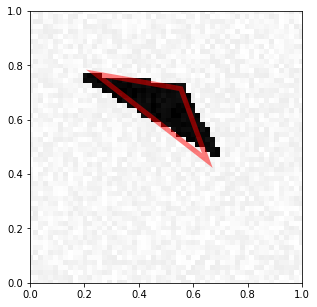

47 [ 1.51144456  0.76751251  0.80296932 -0.11049737 -2.85505423  0.90511934] [-0.02676507  0.9178355   0.2690813   0.7280683  -0.47063646 -0.1662339 ]


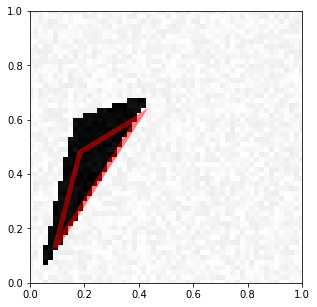

48 [-0.46609221  0.31535564 -0.40887419  0.60601948 -3.59693499 -1.52085732] [-0.8103608  -1.275623   -1.4094609  -0.07537012 -1.734832    0.40092805]


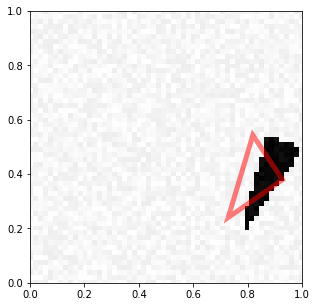

49 [ 3.23070957  0.08441786  2.11573359 -0.06289974  0.14336615 -1.0223481 ] [ 2.531296   -0.8953497   1.4674195   0.13941178  0.9422451  -0.40968484]


In [20]:
Y_get = model3.predict(X_test)
for i in range(50):
    visualize_prediction(X_test[i], variance*Y_get[i]+meaned)
    print(i, Y_test[i], Y_get[i])

In [21]:
model3.evaluate(X_test,variance*Y_test+meaned)

300/300 [==============================] - 1s 3ms/step


0.8922017749150594

We can see that we finally get a loss of around 1. It should be keep in mind that we normalised the labels by their variance. Such a result gives a loss of around 0.05 with non normalised data. <br>
We can see when visualising the data that the results are fairly good, bu there may be some big errors for some big traingles that are predicted as very thin ones.

## Image Denoising

The last problem of this DM is to denoise images of traingle in order to recreate the same traingle without any noise.
In order to do this, we will use a U-net neural network.
<br>
First of all, we will need to generate the data for denoisng new ones. For this, we just need to slightly modify the algorithms to generate triangles given in the python code.

In [22]:


def generate_a_triangle_noise(noise=0.0):
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    imdata, imdata_noised = generate_a_drawing(figsize, U, V, 0), generate_a_drawing(figsize, U, V, noise)
    imdata = (imdata + noise) / (255 + 2 * noise)
    imdata_noised = (imdata_noised + noise)/(255+2*noise)
    return imdata, imdata_noised

def generate_noise(nb,noise=20.0):
    list_data, list_noised = [], []
    for i in range(nb):
        Y,X = generate_a_triangle_noise(noise)
        list_data.append(Y)
        list_noised.append(X)
    return np.array(list_noised), np.array(list_data)

In [23]:
X_train, Y_train = generate_noise(100,20)
X_val, Y_val = generate_noise(50,20)
X_test, Y_test = generate_noise(50,20)

size = int(np.sqrt(X_train.shape[1])) 

X_train = X_train.reshape((X_train.shape[0], size,size,1))
Y_train = Y_train.reshape((Y_train.shape[0], size,size,1))

X_val = X_val.reshape((X_val.shape[0], size,size,1))
Y_val = Y_val.reshape((Y_val.shape[0], size,size,1))

X_test = X_test.reshape((X_test.shape[0], size,size,1))
Y_test = Y_test.reshape((Y_test.shape[0], size,size,1))


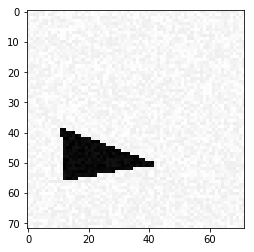

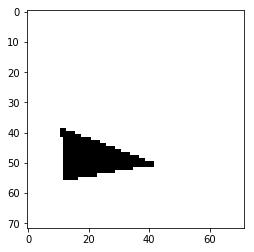

In [24]:
plt.figure()
plt.imshow(X_train[1].reshape((size, size)), cmap='gray')
plt.figure()
plt.imshow(Y_train[1].reshape((size, size)), cmap='gray')

In [25]:
nb_classes = 1
inputs = Input(shape = (size, size, 1))

We now use a U-Net, to denoise the data. We don't need to use too many layer to obtain good results.

In [26]:
conv1a = Conv2D(64, 3, activation = 'relu', padding='same')(inputs)
conv1b = Conv2D(64, 3, activation = 'relu', padding='same')(conv1a)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1b)

conv2a = Conv2D(128, 3, activation = 'relu', padding='same')(pool1)
conv2b = Conv2D(128, 3, activation = 'relu', padding='same')(conv2a)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2b)

conv3a = Conv2D(256, 3, activation = 'relu', padding='same')(pool2)
conv3b = Conv2D(256, 3, activation = 'relu', padding='same')(conv3a)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3b)

up8 = UpSampling2D(size = (2,2))(pool3)
up_conv8 = Conv2D(128, 2, activation = 'relu', padding='same')(up8)
conv8b = Conv2D(128, 3, activation = 'relu', padding='same')(up_conv8)
conv8c = Conv2D(128, 3, activation = 'relu', padding='same')(conv8b)

up9 = UpSampling2D(size = (2,2))(conv8c)
up_conv9 = Conv2D(64, 2, activation = 'relu', padding='same')(up9)
conv9b = Conv2D(64, 3, activation = 'relu', padding='same')(up_conv9)
conv9c = Conv2D(64, 3, activation = 'relu', padding='same')(conv9b)

up10 = UpSampling2D(size = (2,2))(conv9c)
up_conv10 = Conv2D(32, 2, activation = 'relu', padding='same')(up10)
conv10b = Conv2D(32, 3, activation = 'relu', padding='same')(up_conv10)
conv10c = Conv2D(32, 3, activation = 'relu', padding='same')(conv10b)
final = Conv2D(nb_classes, 1)(conv10c)

In [27]:
denoising = Model(input = inputs, output = final)
print(denoising.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 36, 36, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
__________

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.


In [28]:
denoising.compile(optimizer = 'adam', loss = 'mean_absolute_error')
denoising.fit(X_train, Y_train,  epochs=20, batch_size=1, verbose=1, validation_data = (X_val, Y_val))

Train on 100 samples, validate on 50 samples
Epoch 1/20
100/100 [==============================] - 17s 173ms/step - loss: 0.2659 - val_loss: 0.0952
Epoch 2/20
100/100 [==============================] - 16s 165ms/step - loss: 0.0700 - val_loss: 0.0354
Epoch 3/20
100/100 [==============================] - 17s 170ms/step - loss: 0.0572 - val_loss: 0.0606
Epoch 4/20
100/100 [==============================] - 16s 164ms/step - loss: 0.0354 - val_loss: 0.0415
Epoch 5/20
100/100 [==============================] - 16s 164ms/step - loss: 0.0324 - val_loss: 0.0352
Epoch 6/20
100/100 [==============================] - 17s 165ms/step - loss: 0.0266 - val_loss: 0.0201
Epoch 7/20
100/100 [==============================] - 16s 164ms/step - loss: 0.0215 - val_loss: 0.0370
Epoch 8/20
100/100 [==============================] - 16s 164ms/step - loss: 0.0278 - val_loss: 0.0122
Epoch 9/20
100/100 [==============================] - 16s 164ms/step - loss: 0.0199 - val_loss: 0.0194
Epoch 10/20
100/100 [=======

In [29]:
Y_get0 = denoising.predict(X_test)

We can  see in the following results that we obtain fairly good results, and a really small loss, as it is only of 0.01.

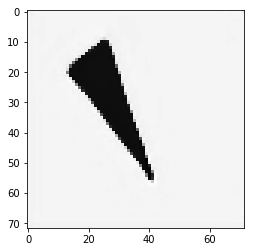

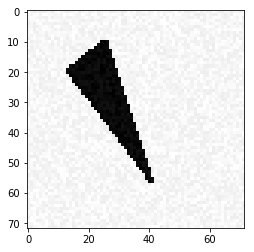

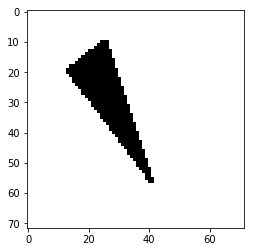

In [30]:
plt.figure(1)
plt.imshow(Y_get0[3,:,:,0], cmap='gray')
plt.figure(2)
plt.imshow(X_test[3,:,:,0], cmap='gray')
plt.figure(3)
plt.imshow(Y_test[3, :, :, 0], cmap='gray')


In [31]:
denoising.evaluate(X_test,Y_test)

50/50 [==============================] - 2s 41ms/step


0.011257973536849021